**Your system will be ranked/graded according to F1 score for the positive class.**

**Read the data**

In [2]:
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
filename= "TrainPortion_Data.csv"
df = pd.read_csv(filename)

In [5]:
resultF = "TrainPortion_Label_.csv"
dfR = pd.read_csv(resultF)

In [6]:
df["charged_off"] = dfR["charged_off"]

In [7]:
df.head()

,id,loan_amnt,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,desc,...,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,charged_off
0,168588,10000.0,36 months,308.73,QA Analyst,3 years,RENT,51000.0,Not Verified,NaN,...,4054.0,0.0,0.0,0.0,0.0,66394.0,40537.0,21400.0,39894.0,-1
1,897426,20000.0,60 months,489.45,Sales Manager,3 years,MORTGAGE,90000.0,Source Verified,NaN,...,20263.0,0.0,0.0,1.0,0.0,370890.0,111757.0,20800.0,119086.0,1
2,855123,30000.0,36 months,1032.49,VP of Marketing,3 years,OWN,90980.0,Verified,NaN,...,1223.0,0.0,0.0,0.0,0.0,31800.0,7340.0,25800.0,0.0,1
3,806869,21000.0,60 months,503.02,IT Analyst,8 years,MORTGAGE,124000.0,Not Verified,NaN,...,42401.0,0.0,0.0,7.0,0.0,281786.0,47519.0,23500.0,33836.0,-1
4,477407,12775.0,36 months,450.97,Ass manager,< 1 year,RENT,35500.0,Source Verified,NaN,...,1162.0,0.0,0.0,0.0,0.0,21754.0,5809.0,4700.0,10054.0,1


In [8]:
df.tail()

,id,loan_amnt,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,desc,...,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,charged_off
537865,448821,5000.0,36 months,157.10,Cartographic Technician,10+ years,MORTGAGE,47790.0,Not Verified,NaN,...,11820.0,0.0,0.0,3.0,0.0,265726.0,30809.0,22200.0,21530.0,-1
537866,432427,20000.0,36 months,677.07,Executive admin,10+ years,RENT,62000.0,Source Verified,NaN,...,4979.0,0.0,0.0,0.0,1.0,50838.0,39834.0,8000.0,40738.0,-1
537867,945346,10000.0,36 months,354.30,personal banker,3 years,RENT,32500.0,Verified,NaN,...,6886.0,0.0,0.0,0.0,0.0,42534.0,34432.0,5900.0,33934.0,-1
537868,575633,10000.0,36 months,315.17,second operations,1 year,RENT,25000.0,Source Verified,NaN,...,1842.0,0.0,0.0,0.0,0.0,31080.0,14735.0,5400.0,24180.0,1
537869,514174,19200.0,36 months,586.20,Engineer,5 years,RENT,98000.0,Verified,NaN,...,2397.0,0.0,0.0,0.0,0.0,110400.0,21569.0,107400.0,0.0,-1


In [9]:
df.shape

(537870, 46)

In [10]:
df.dtypes

id                              int64
loan_amnt                     float64
term                           object
installment                   float64
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
total_acc                     float64
initial_list_status            object
application_type               object
annual_inc_joint              float64
dti_joint                     float64
acc_now_delinq                float64
tot_coll_amt

**In this data set, there are 537870 rows and 46 columns. Categorical and numeric datas will be explored separately.**

In [12]:
num_var = ["id", "loan_amnt", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec",
          "total_acc", "annual_inc_joint", "dti_joint", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_bal_il",
          "il_util", "max_bal_bc", "all_util", "inq_fi", "total_cu_tl", "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal",
          "chargeoff_within_12_mths", "delinq_amnt", "mort_acc", "pub_rec_bankruptcies", "tot_hi_cred_lim", "total_bal_ex_mort",
          "total_bc_limit", "total_il_high_credit_limit"]


cat_var = ["emp_title", "emp_length", "home_ownership", "verification_status",  "desc", "purpose", "title", "zip_code", 
          "addr_state", "earliest_cr_line", "initial_list_status", "application_type"]

In [14]:
df.describe()

,id,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,...,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,charged_off
count,537870.000000,537870.000000,537870.000000,5.378700e+05,537843.000000,537870.000000,537869.000000,537870.000000,537870.000000,537870.000000,...,537870.000000,537870.000000,537870.000000,537870.000000,537870.000000,5.378700e+05,5.378700e+05,5.378700e+05,5.378700e+05,537870.000000
mean,550097.137942,14641.322392,443.308401,7.713211e+04,18.848694,0.343728,0.606687,11.904999,0.252723,25.481533,...,13225.318956,0.009971,18.757698,1.657019,0.150302,1.741951e+05,5.151896e+04,2.155565e+04,4.379640e+04,-0.533791
std,259812.896967,8687.766921,261.807636,7.264060e+04,9.426997,0.927545,0.895440,5.659108,0.658696,12.219697,...,15971.834450,0.114434,873.035518,1.962364,0.405945,1.789727e+05,4.857237e+04,2.164276e+04,4.387092e+04,0.845617
min,100000.000000,1000.000000,14.010000,0.000000e+00,-1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000
25%,325118.250000,8000.000000,252.630000,4.677550e+04,12.280000,0.000000,0.000000,8.000000,0.000000,17.000000,...,3155.000000,0.000000,0.000000,0.000000,0.000000,5.073800e+04,2.204900e+04,7.700000e+03,1.591000e+04,-1.000000
50%,550123.500000,12500.000000,378.200000,6.500000e+04,18.260000,0.000000,0.000000,11.000000,0.000000,24.000000,...,7261.000000,0.000000,0.000000,1.000000,0.000000,1.115695e+05,3.898350e+04,1.500000e+04,3.334450e+04,-1.000000
75%,775018.750000,20000.000000,589.220000,9.200000e+04,24.960000,0.000000,1.000000,15.000000,0.000000,32.000000,...,18168.000000,0.000000,0.000000,3.000000,0.000000,2.503750e+05,6.501700e+04,2.790000e+04,5.868500e+04,-1.000000
max,999998.000000,40000.000000,1584.900000,9.550000e+06,999.000000,39.000000,6.000000,90.000000,86.000000,176.000000,...,555925.000000,10.000000,94521.000000,51.000000,11.000000,9.999999e+06,2.921551e+06,1.105500e+06,2.101913e+06,1.000000


In [15]:
df["charged_off"].value_counts()

-1    412490
 1    125380
Name: charged_off, dtype: int64

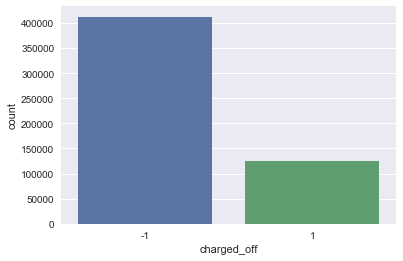

In [16]:
sns.set()
sns.countplot(df["charged_off"],label="Count")
plt.show()

# num_var Analysis

In [17]:
correlations = df[num_var].corr()
correlations = correlations.iloc[:36, :36] 
cut_off = 0.5
high_corrs = correlations[correlations.abs() > cut_off][correlations.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attributes1', 'Attributes2', 'Correlations']
high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep = 'first')
high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)

,Attributes1,Attributes2,Correlations
12,tot_cur_bal,tot_hi_cred_lim,0.966754
15,total_bal_il,total_il_high_credit_limit,0.960033
0,loan_amnt,installment,0.953365
14,total_bal_il,total_bal_ex_mort,0.895643
34,total_bal_ex_mort,total_il_high_credit_limit,0.870971
10,tot_cur_bal,avg_cur_bal,0.834603
22,avg_cur_bal,tot_hi_cred_lim,0.790159
2,annual_inc,annual_inc_joint,0.708986
3,open_acc,total_acc,0.706163
4,pub_rec,pub_rec_bankruptcies,0.635267


In [18]:
df[num_var].isnull().sum()

id                                 0
loan_amnt                          0
installment                        0
annual_inc                         0
dti                               27
delinq_2yrs                        0
inq_last_6mths                     1
open_acc                           0
pub_rec                            0
total_acc                          0
annual_inc_joint              533734
dti_joint                     533734
acc_now_delinq                     0
tot_coll_amt                       0
tot_cur_bal                        0
total_bal_il                  310940
il_util                       339162
max_bal_bc                    310940
all_util                      310955
inq_fi                        310940
total_cu_tl                   310941
inq_last_12m                  310941
acc_open_past_24mths               0
avg_cur_bal                        0
chargeoff_within_12_mths           0
delinq_amnt                        0
mort_acc                           0
p

**The columns which have null data more than 500.000 rows will not be used in our models. These are: annual_inc_joint and dti_joint.**

**Correlations with class**

In [19]:
# Correlation with the charged off variable
corr = df.corr()["charged_off"]
corr[np.argsort(corr, axis=0)[::-1]] 

charged_off                   1.000000
dti_joint                     0.171233
dti                           0.119784
acc_open_past_24mths          0.111468
all_util                      0.101064
inq_last_6mths                0.083942
inq_last_12m                  0.062507
loan_amnt                     0.059265
il_util                       0.053860
installment                   0.047398
inq_fi                        0.047034
open_acc                      0.034159
pub_rec                       0.025839
pub_rec_bankruptcies          0.025814
delinq_2yrs                   0.020164
chargeoff_within_12_mths      0.004452
delinq_amnt                   0.004203
acc_now_delinq                0.003759
total_bal_il                  0.003158
total_il_high_credit_limit    0.000402
id                           -0.000741
tot_coll_amt                 -0.001292
total_bal_ex_mort            -0.002957
total_acc                    -0.008645
total_cu_tl                  -0.016164
max_bal_bc               

** Fill the NA values with the related column's median value.**

In [20]:
df["total_bal_il"].fillna(df["il_util"].median(), inplace=True)

In [21]:
df["il_util"].fillna(df["il_util"].median(), inplace=True)

In [22]:
df["max_bal_bc"].fillna(df["max_bal_bc"].median(), inplace=True)

In [23]:
df["all_util"].fillna(df["all_util"].median(), inplace=True)

In [24]:
df["inq_fi"].fillna(df["inq_fi"].median(), inplace=True)

In [25]:
df["total_cu_tl"].fillna(df["total_cu_tl"].median(), inplace=True)

In [26]:
df["inq_last_12m"].fillna(df["inq_last_12m"].median(), inplace=True)

In [27]:
df["dti"].fillna(df["dti"].median(), inplace=True)

In [28]:
df["inq_last_6mths"].fillna(df["inq_last_6mths"].median(), inplace=True)

In [29]:
df[num_var].isnull().sum()

id                                 0
loan_amnt                          0
installment                        0
annual_inc                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
total_acc                          0
annual_inc_joint              533734
dti_joint                     533734
acc_now_delinq                     0
tot_coll_amt                       0
tot_cur_bal                        0
total_bal_il                       0
il_util                            0
max_bal_bc                         0
all_util                           0
inq_fi                             0
total_cu_tl                        0
inq_last_12m                       0
acc_open_past_24mths               0
avg_cur_bal                        0
chargeoff_within_12_mths           0
delinq_amnt                        0
mort_acc                           0
p

# cat_var Analysis

In [30]:
df[cat_var].isnull().sum()

emp_title               32050
emp_length              31913
home_ownership              0
verification_status         0
desc                   537815
purpose                     0
title                   11845
zip_code                    0
addr_state                  0
earliest_cr_line            0
initial_list_status         0
application_type            0
dtype: int64

In [31]:
df[cat_var].head()

,emp_title,emp_length,home_ownership,verification_status,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
0,QA Analyst,3 years,RENT,Not Verified,NaN,debt_consolidation,Debt consolidation,337xx,FL,Apr-2001,w,Individual
1,Sales Manager,3 years,MORTGAGE,Source Verified,NaN,debt_consolidation,Debt consolidation,231xx,VA,May-2004,w,Individual
2,VP of Marketing,3 years,OWN,Verified,NaN,medical,Medical expenses,912xx,CA,Jul-1995,f,Individual
3,IT Analyst,8 years,MORTGAGE,Not Verified,NaN,debt_consolidation,Debt consolidation,630xx,MO,Aug-2003,w,Individual
4,Ass manager,< 1 year,RENT,Source Verified,NaN,debt_consolidation,Debt consolidation,444xx,OH,Nov-2011,w,Individual


                  RENT  MORTGAGE    OWN  ANY
home_ownership   58711     52066  14593   10
home_ownership  154992    211056  46406   36


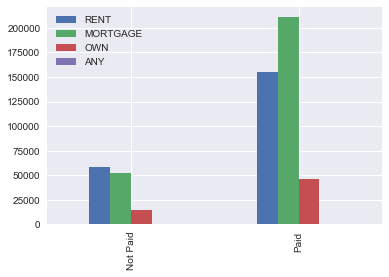

In [32]:
notpaid = df[df["charged_off"]==1]["home_ownership"].value_counts()
paid = df[df["charged_off"]==-1]["home_ownership"].value_counts()
frame = pd.DataFrame([notpaid, paid])
print(frame)

frame.index = ["Not Paid", "Paid"]
frame.plot(kind="bar")

                     Source Verified  Verified  Not Verified
verification_status            54511     45972         24897
verification_status           176018    112731        123741


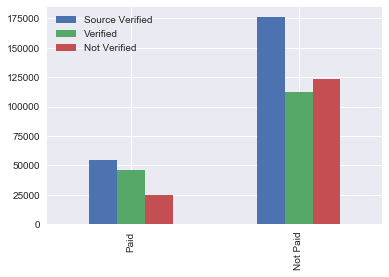

In [33]:
paid = df[df["charged_off"]==1]["verification_status"].value_counts()
notpaid = df[df["charged_off"]==-1]["verification_status"].value_counts()
frame = pd.DataFrame([paid, notpaid])
print(frame)

frame.index = ["Paid", "Not Paid"]
frame.plot(kind="bar")

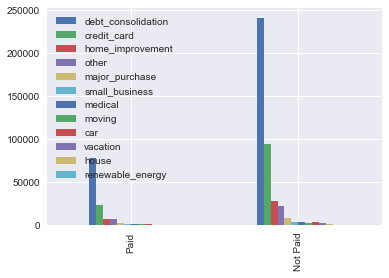

In [34]:
paid = df[df["charged_off"]==1]["purpose"].value_counts()
notpaid = df[df["charged_off"]==-1]["purpose"].value_counts()
frame = pd.DataFrame([paid, notpaid])
#print(frame)

frame.index = ["Paid", "Not Paid"]
frame.plot(kind="bar")

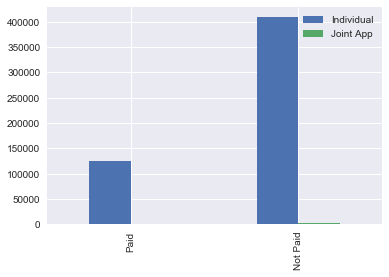

In [35]:
paid = df[df["charged_off"]==1]["application_type"].value_counts()
notpaid = df[df["charged_off"]==-1]["application_type"].value_counts()
frame = pd.DataFrame([paid, notpaid])
#print(frame)

frame.index = ["Paid", "Not Paid"]
frame.plot(kind="bar")

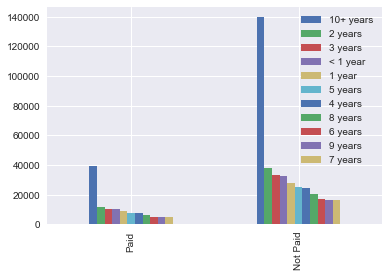

In [36]:
paid = df[df["charged_off"]==1]["emp_length"].value_counts()
notpaid = df[df["charged_off"]==-1]["emp_length"].value_counts()
frame = pd.DataFrame([paid, notpaid])
#print(frame)

frame.index = ["Paid", "Not Paid"]
frame.plot(kind="bar")

In [37]:
df["emp_title"].value_counts().head()

Teacher       9685
Manager       8960
Owner         4878
Supervisor    4017
RN            3956
Name: emp_title, dtype: int64

In [38]:
df.emp_title.fillna(value = "Other", inplace = True)

In [39]:
df["new_manager"] = np.where((df.emp_title.str.lower().str.contains("manager")) | 
                             (df.emp_title.str.lower().str.contains("president")) | 
                             (df.emp_title.str.lower().str.contains("supervisor")) |
                             (df.emp_title.str.lower().str.contains("director")) |
                             (df.emp_title.str.lower().str.contains("corrdinator")) |
                             (df.emp_title.str.lower().str.contains("owner")), 1, 0)

df["new_spec"] = np.where((df.emp_title.str.lower().str.contains("analyst")) | 
                             (df.emp_title.str.lower().str.contains("engineer")) | 
                             (df.emp_title.str.lower().str.contains("specialist")) |
                             (df.emp_title.str.lower().str.contains("teacher")) |
                             (df.emp_title.str.lower().str.contains("consultant")) |
                             (df.emp_title.str.lower().str.contains("master")), 1, 0)

df["new_tech"] = np.where((df.emp_title.str.lower().str.contains("sales")) | 
                             (df.emp_title.str.lower().str.contains("assistant")) |
                             (df.emp_title.str.lower().str.contains("spec")) , 1, 0)

df["new_med"] = np.where((df.emp_title.str.lower().str.contains("doctor")) | 
                             (df.emp_title.str.lower().str.contains("nurse")) | 
                             (df.emp_title.str.lower().str.contains("farma")), 1, 0)

df["new_op"] = np.where((df.emp_title.str.lower().str.contains("operator")) | 
                             (df.emp_title.str.lower().str.contains("techinical ")) | 
                             (df.emp_title.str.lower().str.contains("foreman")) |
                             (df.emp_title.str.lower().str.contains("driver")) |
                             (df.emp_title.str.lower().str.contains("service")), 1, 0)

In [40]:
df.head()

,id,loan_amnt,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,desc,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,charged_off,new_manager,new_spec,new_tech,new_med,new_op
0,168588,10000.0,36 months,308.73,QA Analyst,3 years,RENT,51000.0,Not Verified,NaN,...,66394.0,40537.0,21400.0,39894.0,-1,0,1,0,0,0
1,897426,20000.0,60 months,489.45,Sales Manager,3 years,MORTGAGE,90000.0,Source Verified,NaN,...,370890.0,111757.0,20800.0,119086.0,1,1,0,1,0,0
2,855123,30000.0,36 months,1032.49,VP of Marketing,3 years,OWN,90980.0,Verified,NaN,...,31800.0,7340.0,25800.0,0.0,1,0,0,0,0,0
3,806869,21000.0,60 months,503.02,IT Analyst,8 years,MORTGAGE,124000.0,Not Verified,NaN,...,281786.0,47519.0,23500.0,33836.0,-1,0,1,0,0,0
4,477407,12775.0,36 months,450.97,Ass manager,< 1 year,RENT,35500.0,Source Verified,NaN,...,21754.0,5809.0,4700.0,10054.0,1,1,0,0,0,0


In [41]:
df.emp_length.value_counts()

10+ years    178899
2 years       49286
3 years       43318
< 1 year      42833
1 year        36339
5 years       32561
4 years       31830
8 years       26142
6 years       22051
9 years       21379
7 years       21319
Name: emp_length, dtype: int64

In [42]:
length = ["10+ years", "< 1 year", "1 year", "2 years", "3 years", 
          "4 years", "5 years", "6 years", "7 years", "8 years", "9 years"]

df["new_0-3_years"] = np.where((df.emp_length.str.lower().str.contains("< 1 year")) | 
                           (df.emp_length.str.lower().str.contains("1 year")) | 
                           (df.emp_length.str.lower().str.contains("2 years")) |
                           (df.emp_length.str.lower().str.contains("3 years")), 1, 0)

df["new_4-9_years"] = np.where((df.emp_length.str.lower().str.contains("4 years")) | 
                           (df.emp_length.str.lower().str.contains("5 years")) | 
                           (df.emp_length.str.lower().str.contains("6 years")) |
                           (df.emp_length.str.lower().str.contains("7 years")) |
                           (df.emp_length.str.lower().str.contains("8 years")) |
                           (df.emp_length.str.lower().str.contains("9 years")), 1, 0)

df["new_10_moreyears"] = np.where(df.emp_length.str.lower().str.contains("10+ years"),1,0)

In [43]:
df.head()

,id,loan_amnt,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,desc,...,total_il_high_credit_limit,charged_off,new_manager,new_spec,new_tech,new_med,new_op,new_0-3_years,new_4-9_years,new_10_moreyears
0,168588,10000.0,36 months,308.73,QA Analyst,3 years,RENT,51000.0,Not Verified,NaN,...,39894.0,-1,0,1,0,0,0,1,0,0
1,897426,20000.0,60 months,489.45,Sales Manager,3 years,MORTGAGE,90000.0,Source Verified,NaN,...,119086.0,1,1,0,1,0,0,1,0,0
2,855123,30000.0,36 months,1032.49,VP of Marketing,3 years,OWN,90980.0,Verified,NaN,...,0.0,1,0,0,0,0,0,1,0,0
3,806869,21000.0,60 months,503.02,IT Analyst,8 years,MORTGAGE,124000.0,Not Verified,NaN,...,33836.0,-1,0,1,0,0,0,0,1,0
4,477407,12775.0,36 months,450.97,Ass manager,< 1 year,RENT,35500.0,Source Verified,NaN,...,10054.0,1,1,0,0,0,0,1,0,0


In [44]:
df.initial_list_status.value_counts()

w    358262
f    179608
Name: initial_list_status, dtype: int64

**Encoding**

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [46]:
encoder.fit(df["home_ownership"])
df["new_homeowner_num"] = encoder.transform(df["home_ownership"])

encoder.fit(df["purpose"])
df["new_purpose"] = encoder.transform(df["purpose"])

encoder.fit(df["verification_status"])
df["new_ver_status"] = encoder.transform(df["verification_status"])

encoder.fit(df["application_type"])
df["new_app_type"] = encoder.transform(df["application_type"])

encoder.fit(df["initial_list_status"])
df["new_initial_status"] = encoder.transform(df["initial_list_status"])

In [47]:
df.head()

,id,loan_amnt,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,desc,...,new_med,new_op,new_0-3_years,new_4-9_years,new_10_moreyears,new_homeowner_num,new_purpose,new_ver_status,new_app_type,new_initial_status
0,168588,10000.0,36 months,308.73,QA Analyst,3 years,RENT,51000.0,Not Verified,NaN,...,0,0,1,0,0,3,2,0,0,1
1,897426,20000.0,60 months,489.45,Sales Manager,3 years,MORTGAGE,90000.0,Source Verified,NaN,...,0,0,1,0,0,1,2,1,0,1
2,855123,30000.0,36 months,1032.49,VP of Marketing,3 years,OWN,90980.0,Verified,NaN,...,0,0,1,0,0,2,6,2,0,0
3,806869,21000.0,60 months,503.02,IT Analyst,8 years,MORTGAGE,124000.0,Not Verified,NaN,...,0,0,0,1,0,1,2,0,0,1
4,477407,12775.0,36 months,450.97,Ass manager,< 1 year,RENT,35500.0,Source Verified,NaN,...,0,0,1,0,0,3,2,1,0,1


In [48]:
total_var = ["loan_amnt", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec",
          "total_acc", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_bal_il",
          "il_util", "max_bal_bc", "all_util", "inq_fi", "total_cu_tl", "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal",
          "chargeoff_within_12_mths", "delinq_amnt", "mort_acc", "pub_rec_bankruptcies", "tot_hi_cred_lim", "total_bal_ex_mort",
          "total_bc_limit", "total_il_high_credit_limit", "new_homeowner_num", "new_purpose", "new_ver_status", "new_app_type",
           "new_initial_status","new_4-9_years", "new_0-3_years", "new_manager", "new_spec", "new_med", "new_op", "new_tech"]

# FUNCTIONS

**Functions for Modeling**

In [52]:
#Functions
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier #ensemble 
from sklearn.ensemble import BaggingClassifier #ensemble
from sklearn.ensemble import AdaBoostClassifier #ensemble
from sklearn.ensemble import GradientBoostingClassifier #ensemble
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

**Evaluating the results**

In [53]:
#Accuracy score: 
def trainaccuracy(estimator):
    y_train_pred = estimator.predict(X_train)
    return accuracy_score(y_train, y_train_pred)
    
def testaccuracy(estimator):
    y_test_pred = estimator.predict(X_test)
    return accuracy_score(y_test, y_test_pred)

In [54]:
#f1 score:

def f1score_train(estimator):
    y_train_pred = estimator.predict(X_train)
    return f1_score(y_train, y_train_pred)

def f1score_test(estimator):
    y_test_pred = estimator.predict(X_test)
    return f1_score(y_test, y_test_pred)

In [55]:
#Classification report:

def classreport(estimator):
    y_test_pred = estimator.predict(X_test)
    print(classification_report(y_test, y_test_pred))

# MODELS

**XG BOOST**

Solution: 
    
    0.47085710689956417
{'learning_rate': 0.2, 'max_depth': 6, 'scale_pos_weight': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=3,
       seed=None, silent=True, subsample=1)

In [71]:
import xgboost as xgb
from xgboost import XGBClassifier

#Scale The Data
trainDataX = df[total_var] #do not use inplace
scaler = StandardScaler()
scaler.fit(trainDataX) 
trainDataX = scaler.transform(trainDataX)


#Define X and y
X = trainDataX
y = df["charged_off"]

#Train test split:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=seed)


xg_clf = XGBClassifier(learning_rate = 0.2, scale_pos_weight = 3, max_depth = 6)
xg_clf.fit(X_train, y_train) 
#predictions = gbm.predict(X_test)

#Evaluating Results:
classreport(xg_clf)
trainaccuracy_xg = trainaccuracy(xg_clf)
testaccuracy_xg = testaccuracy(xg_clf)
f1score_train_xg = f1score_train(xg_clf)
f1score_test_xg = f1score_test(xg_clf)

print("Train accuracy:", trainaccuracy_xg)
print("Test accuracy:", testaccuracy_xg)
print("Train f1_score:", f1score_train_xg)
print("Test f1score:", f1score_test_xg)


             precision    recall  f1-score   support

         -1       0.86      0.70      0.77     82498
          1       0.38      0.62      0.47     25076

avg / total       0.75      0.68      0.70    107574

Train accuracy: 0.6986748656738617
Test accuracy: 0.6804432297767119
Train f1_score: 0.5020450643859239
Test f1score: 0.473229335866867


**Feature selection with XGBoost: **

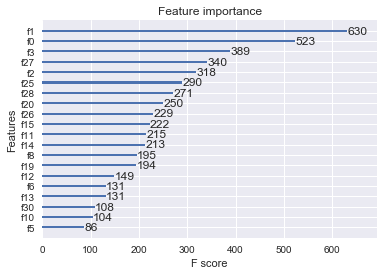

In [72]:
xgb.plot_importance(xg_clf, max_num_features = 20, importance_type='weight')
plt.show()

In [90]:
print(total_var)
print(xg_clf.feature_importances_)
print(len(total_var), len(xg_clf.feature_importances_))

['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'il_util', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt', 'mort_acc', 'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'new_homeowner_num', 'new_purpose', 'new_ver_status', 'new_app_type', 'new_initial_status', 'new_4-9_years', 'new_0-3_years', 'new_manager', 'new_spec', 'new_med', 'new_op', 'new_tech']
[0.09162579 0.11037141 0.05571128 0.06814996 0.01278907 0.01506657
 0.02295025 0.00665732 0.03416258 0.00035039 0.01822004 0.03766643
 0.02610371 0.02295025 0.03731605 0.03889278 0.00770848 0.0143658
 0.01366503 0.03398738 0.04379818 0.         0.0024527  0.01226349
 0.00315347 0.05080589 0.04011913 0.05956552 0.04747723 0.00875964
 0.01892081 

In [92]:
new_dict = {}
for idx in range(len(total_var)):
    feature = total_var[idx]
    new_dict[feature] = xg_clf.feature_importances_[idx]   
print(new_dict)
print(len(new_dict))

{'loan_amnt': 0.09162579, 'installment': 0.11037141, 'annual_inc': 0.05571128, 'dti': 0.06814996, 'delinq_2yrs': 0.012789068, 'inq_last_6mths': 0.015066573, 'open_acc': 0.022950245, 'pub_rec': 0.006657323, 'total_acc': 0.034162577, 'acc_now_delinq': 0.0003503854, 'tot_coll_amt': 0.018220043, 'tot_cur_bal': 0.037666433, 'total_bal_il': 0.026103714, 'il_util': 0.022950245, 'max_bal_bc': 0.037316047, 'all_util': 0.038892783, 'inq_fi': 0.007708479, 'total_cu_tl': 0.0143658025, 'inq_last_12m': 0.013665032, 'acc_open_past_24mths': 0.033987384, 'avg_cur_bal': 0.04379818, 'chargeoff_within_12_mths': 0.0, 'delinq_amnt': 0.002452698, 'mort_acc': 0.01226349, 'pub_rec_bankruptcies': 0.0031534687, 'tot_hi_cred_lim': 0.050805885, 'total_bal_ex_mort': 0.04011913, 'total_bc_limit': 0.05956552, 'total_il_high_credit_limit': 0.047477227, 'new_homeowner_num': 0.0087596355, 'new_purpose': 0.018920813, 'new_ver_status': 0.0087596355, 'new_app_type': 0.0035038542, 'new_initial_status': 0.0038542396, 'new_4-

In [94]:
sorted_feature = sorted(new_dict, key=lambda x: new_dict[x])
for k in sorted_feature:
    if new_dict[k] > 0.01:
        print("{} : {}".format(k, new_dict[k]))

mort_acc : 0.01226348988711834
delinq_2yrs : 0.012789067812263966
inq_last_12m : 0.013665031641721725
total_cu_tl : 0.014365802519023418
inq_last_6mths : 0.015066573396325111
tot_coll_amt : 0.018220042809844017
new_purpose : 0.018920812755823135
open_acc : 0.022950245067477226
il_util : 0.022950245067477226
total_bal_il : 0.026103714480996132
acc_open_past_24mths : 0.0339873842895031
total_acc : 0.034162577241659164
max_bal_bc : 0.03731604665517807
tot_cur_bal : 0.037666432559490204
all_util : 0.03889278322458267
total_bal_ex_mort : 0.04011913016438484
avg_cur_bal : 0.04379817843437195
total_il_high_credit_limit : 0.047477226704359055
tot_hi_cred_lim : 0.05080588534474373
annual_inc : 0.055711280554533005
total_bc_limit : 0.05956552177667618
dti : 0.06814996153116226
loan_amnt : 0.09162578731775284
installment : 0.1103714108467102


**New feature set contains the important features according to xgboost as well as the new columns I prepared for categorical variables. **

In [61]:
total_var_2 = ["loan_amnt", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "total_acc", 
             "tot_coll_amt", "tot_cur_bal", "total_bal_il", "il_util", "max_bal_bc", "all_util", "total_cu_tl", "inq_last_12m", 
             "acc_open_past_24mths", "avg_cur_bal", "mort_acc", "tot_hi_cred_lim", "total_bal_ex_mort",
          "total_bc_limit", "total_il_high_credit_limit", "new_homeowner_num", "new_purpose", "new_ver_status", 
             "new_manager", "new_spec", "new_med", "new_op", "new_tech"]

In [62]:
import xgboost as xgb
from xgboost import XGBClassifier

#Scale The Data
trainDataX = df[total_var_2] #do not use inplace
scaler = StandardScaler()
scaler.fit(trainDataX) 
trainDataX = scaler.transform(trainDataX)


#Define X and y
X = trainDataX
y = df["charged_off"]

#Train test split:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=seed)


xg_clf = XGBClassifier(learning_rate = 0.2, scale_pos_weight = 3, max_depth = 6)
xg_clf.fit(X_train, y_train) 
#predictions = gbm.predict(X_test)

#Evaluating Results:
classreport(xg_clf)
trainaccuracy_xg = trainaccuracy(xg_clf)
testaccuracy_xg = testaccuracy(xg_clf)
f1score_train_xg = f1score_train(xg_clf)
f1score_test_xg = f1score_test(xg_clf)

print("Train accuracy:", trainaccuracy_xg)
print("Test accuracy:", testaccuracy_xg)
print("Train f1_score:", f1score_train_xg)
print("Test f1score:", f1score_test_xg)


             precision    recall  f1-score   support

         -1       0.86      0.70      0.77     82498
          1       0.38      0.62      0.47     25076

avg / total       0.75      0.68      0.70    107574

Train accuracy: 0.6981566177700932
Test accuracy: 0.680229423466637
Train f1_score: 0.5016384133099018
Test f1score: 0.4735625851277107


# TEST DATA

In [90]:
testFileName = "TestPortion_Data.csv"
dfTest = pd.read_csv(testFileName)
dfTest.isnull().sum()

id                                 0
loan_amnt                          0
term                               0
installment                        0
emp_title                       7276
emp_length                      7169
home_ownership                     0
annual_inc                         0
verification_status                0
desc                          102810
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                              103
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
total_acc                          0
initial_list_status                0
application_type                   0
annual_inc_joint               95863
dti_joint                      95863
acc_now_delinq                     0
tot_coll_amt                       0
t

In [91]:
dfTest["dti"].fillna(dfTest["dti"].median(), inplace=True)
dfTest["il_util"].fillna(dfTest["il_util"].median(), inplace=True)
dfTest["all_util"].fillna(dfTest["all_util"].median(), inplace=True)
dfTest["avg_cur_bal"].fillna(dfTest["avg_cur_bal"].median(), inplace=True)

In [92]:
dfTest["new_manager"] = np.where((dfTest.emp_title.str.lower().str.contains("manager")) | 
                             (dfTest.emp_title.str.lower().str.contains("president")) | 
                             (dfTest.emp_title.str.lower().str.contains("supervisor")) |
                             (dfTest.emp_title.str.lower().str.contains("director")) |
                             (dfTest.emp_title.str.lower().str.contains("corrdinator")) |
                             (dfTest.emp_title.str.lower().str.contains("owner")), 1, 0)

dfTest["new_spec"] = np.where((dfTest.emp_title.str.lower().str.contains("analyst")) | 
                             (dfTest.emp_title.str.lower().str.contains("engineer")) | 
                             (dfTest.emp_title.str.lower().str.contains("specialist")) |
                             (dfTest.emp_title.str.lower().str.contains("teacher")) |
                             (dfTest.emp_title.str.lower().str.contains("consultant")) |
                             (dfTest.emp_title.str.lower().str.contains("master")), 1, 0)

dfTest["new_tech"] = np.where((dfTest.emp_title.str.lower().str.contains("sales")) | 
                             (dfTest.emp_title.str.lower().str.contains("assistant")) |
                             (dfTest.emp_title.str.lower().str.contains("spec")) , 1, 0)

dfTest["new_med"] = np.where((dfTest.emp_title.str.lower().str.contains("doctor")) | 
                             (dfTest.emp_title.str.lower().str.contains("nurse")) | 
                             (dfTest.emp_title.str.lower().str.contains("farma")), 1, 0)

dfTest["new_op"] = np.where((dfTest.emp_title.str.lower().str.contains("operator")) | 
                             (dfTest.emp_title.str.lower().str.contains("techinical ")) | 
                             (dfTest.emp_title.str.lower().str.contains("foreman")) |
                             (dfTest.emp_title.str.lower().str.contains("driver")) |
                             (dfTest.emp_title.str.lower().str.contains("service")), 1, 0)

In [94]:
dfTest.emp_length.value_counts()

10+ years    34708
2 years       9329
< 1 year      9136
3 years       8268
1 year        6697
5 years       6299
4 years       6186
6 years       4486
7 years       3720
9 years       3685
8 years       3127
Name: emp_length, dtype: int64

In [95]:
encoder.fit(dfTest["home_ownership"])
dfTest["new_homeowner_num"] = encoder.transform(dfTest["home_ownership"])

encoder.fit(dfTest["purpose"])
dfTest["new_purpose"] = encoder.transform(dfTest["purpose"])

encoder.fit(dfTest["verification_status"])
dfTest["new_ver_status"] = encoder.transform(dfTest["verification_status"])

encoder.fit(dfTest["application_type"])
dfTest["new_app_type"] = encoder.transform(dfTest["application_type"])

encoder.fit(dfTest["initial_list_status"])
dfTest["new_initial_status"] = encoder.transform(dfTest["initial_list_status"])

In [98]:
dfTest[total_var_2].isnull().sum()

loan_amnt                     0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
total_acc                     0
tot_coll_amt                  0
tot_cur_bal                   0
total_bal_il                  0
il_util                       0
max_bal_bc                    0
all_util                      0
total_cu_tl                   0
inq_last_12m                  0
acc_open_past_24mths          0
avg_cur_bal                   0
mort_acc                      0
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
new_homeowner_num             0
new_purpose                   0
new_ver_status                0
new_manager                   0
new_spec                      0
new_med                       0
new_op                        0
new_tech                      0
dtype: i

In [99]:
import xgboost as xgb
from xgboost import XGBClassifier

#Scale The Data
trainDataX = df[total_var_2] #do not use inplace
scaler = StandardScaler()
scaler.fit(trainDataX) 
trainDataX = scaler.transform(trainDataX)

testDataX = dfTest[total_var_2]  
testDataX = scaler.transform(testDataX) 


#Define X and y
X_train = trainDataX
y_train = df["charged_off"]

X_test = testDataX


xg_clf = XGBClassifier(learning_rate = 0.2, scale_pos_weight = 3, max_depth = 6)
xg_clf.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
       silent=True, subsample=1)

In [100]:
y_pred = xg_clf.predict(X_test)

y_pred_np = np.array(y_pred)
y_pred_np.reshape(-1,1)

ids = pd.DataFrame()
ids["Label"] = y_pred

ids.to_csv("xg_pelin.csv", index = False, header = False)

C:\Users\pelin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
